# Fundamentals of Data Analysis
Tasks notebook for Fundamentals of Data Analysis @ GMIT - 2020

Author: Maciej Izydorek (G00387873@gmit.ie) Github: mizydorek

***

#### Task 1 

*Write a Python function called counts that takes a list as
input and returns a dictionary of unique items in the list as keys and the number of times each item appears as values.*

In [1]:
# Version 1.0 
# Really simple approach to solve the Task 1 
# It takes a list, iterate through it and count items in a list and return as a dictionary
def counts():
    # Initial values 
    d = {}
    l = []
    
    l = ['A', 'A', 'B', 'C', 'A']
    
    # iterate through list
    for item in l:
        # check if item is on the list
        if item not in d:
            d[item] = 1
        else:
            d[item] += 1
    print(d)

counts()

{'A': 3, 'B': 1, 'C': 1}


In [2]:
# Version 1.1
# More complex approach to solve the task 1 with nested lists
l = ['A', ['A', 'A', 'B'], 'A', 'B', ['B', 'B']]

# function that counts elements of list and returns as a dictionary 
def counts(l):
    # different approach to count the occurrence by using dict comprehension and built-in count function
    return { i:l.count(i) for i in l }

# Main function that checks if there is a nested list, append all elements to temporary list and applies counts function to it
def reduceall(f, l):
    # temporary list 
    ans = []
    for el in l:
        # checks if element is a list
        if isinstance(el, list):
            # loop through it and append to list
            for subel in el:
                ans.append(subel)
        # if element is not a list, just rewrite to list
        else:
            ans.append(el)
    # applies counts function to list
    ans = f(ans)
    return ans

reduceall(counts, l)

{'A': 4, 'B': 4}

#### Task 2

*Write a Python function called dicerolls that simulates
rolling dice. Your function should take two parameters: the number of dice k and
the number of times to roll the dice n. The function should simulate randomly
rolling k dice n times, keeping track of each total face value. It should then return
a dictionary with the number of times each possible total face value occurred.*

In [3]:
# Version 1.0 
# import random library to generate random numbers
# https://docs.python.org/3/library/random.html
import random 

# main function to simulate randomly rolling k dice n times and return a sorted dictionary with the number of times each possible total face value occurred

def diceroll(k, n):

    d = {}
    l = []

    # iterate n number of times 
    for i in range(n):
        # temp variable 
        num = 0
        # iterate k number of dice
        for j in range(k):
            # generate random number between 1 and 6
            p = random.randint(1,6)
            # sum up result 
            num += p
            
        # append to list 
        l.append(num)
    
    # iterate through a list
    for item in l:
            # check if item is on the list and add one
            if item not in d:
                d[item] = 1
            # if on the list increment by one 
            else:
                d[item] += 1

    # finding on how to sort the dictionaries in python
    # https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
    # return sorted dictionary by items
    return dict(sorted(d.items()))

diceroll(2,1000)


{2: 18,
 3: 60,
 4: 85,
 5: 112,
 6: 140,
 7: 175,
 8: 136,
 9: 103,
 10: 89,
 11: 53,
 12: 29}

In [4]:
# Version 1.1
# dict comprehension used to count the occurrence
# https://realpython.com/list-comprehension-python/
import random 

# main function to simulate randomly rolling k dice n times and return a sorted dictionary with the total number of times each possible total face value occurred

def diceroll(k, n):
    l = []
    # iterate n number of times 
    for i in range(n):
        # temp variable 
        totalFace = 0
        # iterate k number of dice
        for j in range(k):
            # generate random number between 1 and 6 and sum up the result 
            totalFace += random.randint(1,6)   
        # append to list 
        l.append(totalFace)
    # different approach to count the occurrence by using dict comprehension and built-in count function
    d = { i:l.count(i) for i in l }
    return dict(sorted(d.items()))

diceroll(2,1000)

{2: 25,
 3: 53,
 4: 91,
 5: 115,
 6: 126,
 7: 167,
 8: 149,
 9: 108,
 10: 71,
 11: 64,
 12: 31}

#### Task 3

*The numpy.random.binomial function can be used to
simulate flipping a coin with a 50/50 chance of heads or tails. Interestingly, if a
coin is flipped many times then the number of heads is well approximated by a
bell-shaped curve. For instance, if we flip a coin 100 times in a row the chance of
getting 50 heads is relatively high, the chances of getting 0 or 100 heads is relatively
low, and the chances of getting any other number of heads decreases as you move
away from 50 in either direction towards 0 or 100. Write some python code that
simulates flipping a coin 100 times. Then run this code 1,000 times, keeping track
of the number of heads in each of the 1,000 simulations. Select an appropriate
plot to depict the resulting list of 1,000 numbers, showing that it roughly follows
a bell-shaped curve. You should explain your work in a Markdown cell above the
code.*




#### — Binomial

The binomial distribution is a common discrete probability distribution that there is only one outcome for each independent trial of the same probability of success from two independent values under a given set. The Binomial distribution is a discrete version of normal distribution.

— 

[1] — [Binomial distribution](https://www.investopedia.com/terms/b/binomialdistribution.asp)

[2] — [Numpy: Binomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html)


In [5]:
# version 1.0
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
# import libraries 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# plot settings
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12,7]

rng = np.random.default_rng()

# simulating tossing a coin using numpy binomial function

# Input variables
# n: number of independent experiments in each trial
# p: probability of success for each experiment
# size: number of trials
n, p, size = 100, .5, 1000

# numpy binomial function that runs our coin toss trials
samples = rng.binomial(n, p, size)

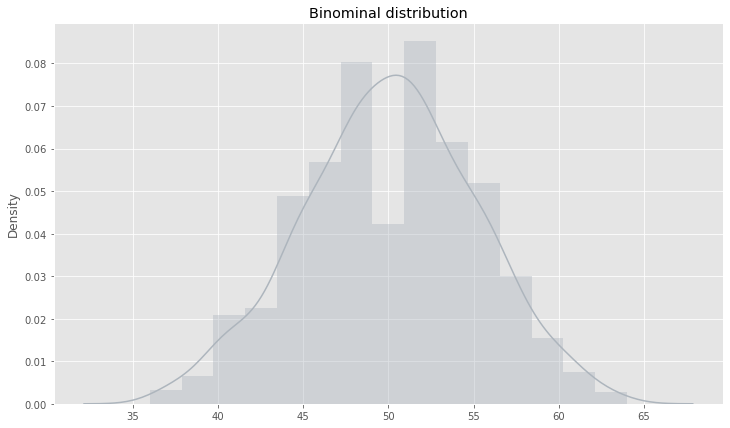

In [6]:
# seaborn distplot function that draw distribution of samples 
sns.distplot(samples, bins=15, hist=True, kde=True, color='#ADB5BD').set_title("Binominal distribution");

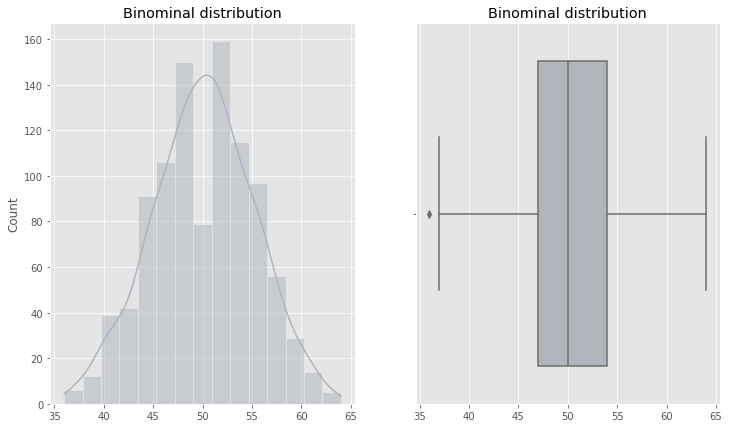

In [7]:
# seaborn histplot vs boxplot function that draw distribution of samples
fig, axs = plt.subplots(1, 2)
sns.histplot(samples,bins=15, stat='count', kde=True, color='#ADB5BD', ax=axs[0]).set_title("Binominal distribution");
sns.boxplot(samples, orient="h", color='#ADB5BD', ax=axs[1]).set_title("Binominal distribution");

In [8]:
# the probability of success
samples.sum() / size

50.092